In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd
from collections import defaultdict, OrderedDict
from tqdm import tqdm
import pickle
from scipy.stats import pearsonr

sns.set_style('whitegrid')

# Combat Corrected vs Uncorrected - GTEx vs TCGA

**Steps**
- Run ComBat as discussed [here](https://github.com/jvivian/rnaseq-recompute-analysis/blob/master/notebooks/ranked_correlation/ComBat%20Batch%20Correction%20Concordance.ipynb)
- Run DESeq2 comparing GTEx to TCGA tumors across all tissues
- Repeat above, but use the ComBat corrected dataset
- Plot gene ranks

In [1]:
def rank(ref_genes, genes_to_rank):
    temp = {}
    ranks = []
    inter = set(ref_genes).intersection(set(genes_to_rank))
    ref_genes = [x for x in ref_genes if x in inter]
    genes_to_rank = [x for x in genes_to_rank if x in inter]
    for i, gene in enumerate(ref_genes):
        temp[gene] = i
    for gene in genes_to_rank:
        ranks.append(temp[gene])
    return ranks

def plot_ranks(ref_genes, genes_to_rank, title, ax):
    ranks = rank(ref_genes, genes_to_rank)
    x = np.array([x for x in xrange(len(ranks))])
    y = np.array(ranks)
    sns.regplot(x, y, ax=ax, scatter_kws={'alpha':0.03})
    ax.set_title(title)

In [10]:
un = {x[:-4]: pd.read_csv(os.path.join('gtex-vs-tcga/results/', x), sep='\t', index_col=0) 
      for x in os.listdir('gtex-vs-tcga/results/')}

com = {x[:-4]: pd.read_csv(os.path.join('gtex-vs-tcga-combat/results/', x), sep='\t', index_col=0) 
      for x in os.listdir('gtex-vs-tcga-combat//results/')}

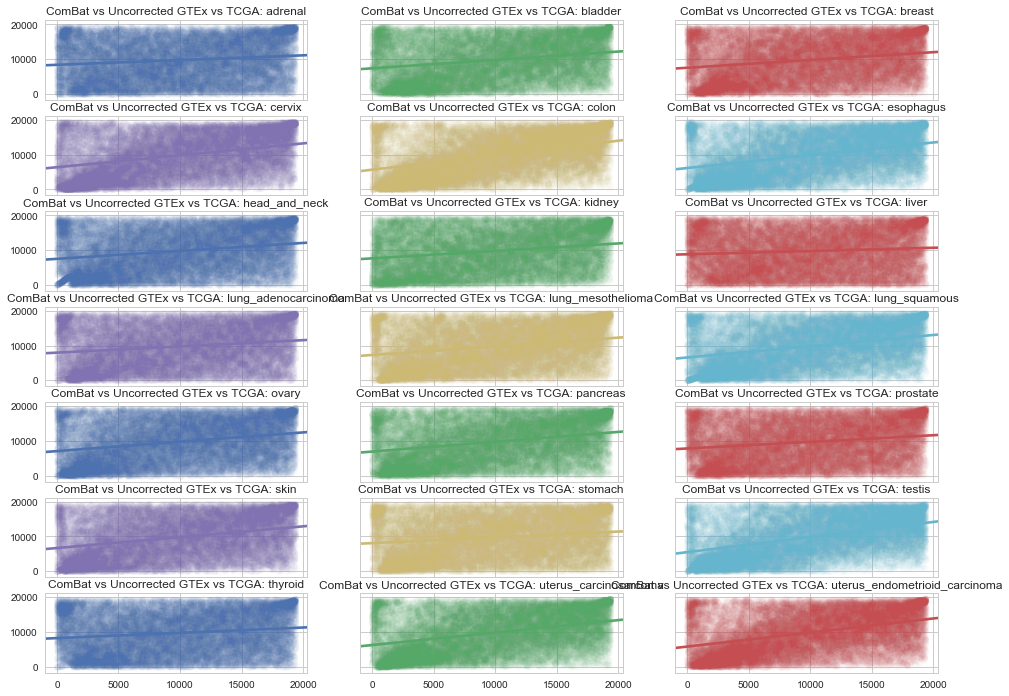

In [23]:
f, axes = plt.subplots(7, 3, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()
for i, t in enumerate(sorted(un.keys())):
    plot_ranks(un[t].index, com[t].index, 
               'ComBat vs Uncorrected GTEx vs TCGA: ' + str(t), axes[i])